🔍 Face detected. Proceeding with eye cropping...
Left Eye - Yellow pixel percentage: 49.69%


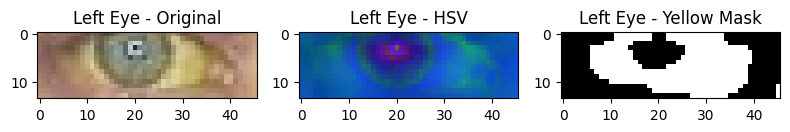

Right Eye - Yellow pixel percentage: 54.60%


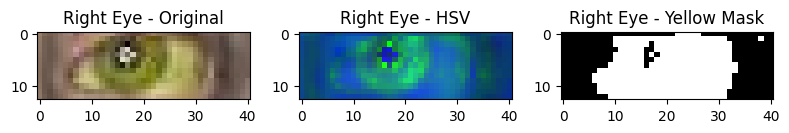

⚠️ Jaundice Detected in Left Eye!
⚠️ Jaundice Detected in Right Eye!


In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
LEFT_EYE_IDX = [33, 133]
RIGHT_EYE_IDX = [362, 263]

# Eye cropping utility
def crop_eye(image, eye_indices, landmarks):
    h, w = image.shape[:2]
    x_coords = [int(landmarks[idx].x * w) for idx in eye_indices]
    y_coords = [int(landmarks[idx].y * h) for idx in eye_indices]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    pad = 5
    x_min, x_max = max(0, x_min - pad), min(w, x_max + pad)
    y_min, y_max = max(0, y_min - pad), min(h, y_max + pad)
    return image[y_min:y_max, x_min:x_max]

# Jaundice detection for a single eye image
def detect_jaundice(image, eye_label='Eye', debug=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_yellow = np.array([15, 40, 40])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    yellow_pixels = cv2.countNonZero(yellow_mask)
    total_pixels = image.shape[0] * image.shape[1]
    yellow_percentage = (yellow_pixels / total_pixels) * 100

    if debug:
        print(f"{eye_label} - Yellow pixel percentage: {yellow_percentage:.2f}%")
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"{eye_label} - Original")

        plt.subplot(1, 3, 2)
        plt.imshow(image_hsv)
        plt.title(f"{eye_label} - HSV")

        plt.subplot(1, 3, 3)
        plt.imshow(yellow_mask, cmap='gray')
        plt.title(f"{eye_label} - Yellow Mask")

        plt.tight_layout()
        plt.show()

    return yellow_percentage > 30.0

# Main execution
image_path = r"sample/jf.jpg"  # Set your image path here
image = cv2.imread(image_path)

if image is None:
    print("❌ Failed to load image. Check the file path.")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        print("🔍 Face detected. Proceeding with eye cropping...")
        landmarks = results.multi_face_landmarks[0].landmark
        left_eye = crop_eye(image, LEFT_EYE_IDX, landmarks)
        right_eye = crop_eye(image, RIGHT_EYE_IDX, landmarks)

        jaundice_left = detect_jaundice(left_eye, eye_label="Left Eye", debug=True)
        jaundice_right = detect_jaundice(right_eye, eye_label="Right Eye", debug=True)

        print("⚠️ Jaundice Detected in Left Eye!" if jaundice_left else "✅ Left Eye Appears Normal")
        print("⚠️ Jaundice Detected in Right Eye!" if jaundice_right else "✅ Right Eye Appears Normal")

    else:
        print("👁️ No face detected. Assuming image contains only an eye...")
        jaundice = detect_jaundice(image, eye_label="Eye", debug=True)
        print("⚠️ Jaundice Detected!" if jaundice else "✅ Eyes Appear Normal")

🔍 Face detected. Proceeding with eye cropping...
Left Eye - Yellow pixel percentage: 3.04%


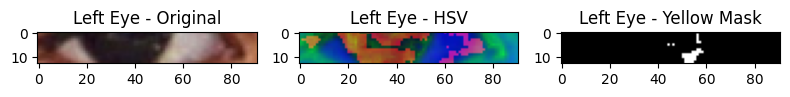

Right Eye - Yellow pixel percentage: 2.57%


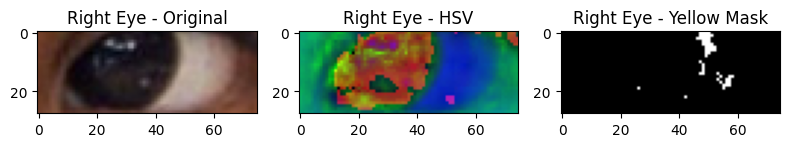

✅ Left Eye Appears Normal
✅ Right Eye Appears Normal


In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
LEFT_EYE_IDX = [33, 133]
RIGHT_EYE_IDX = [362, 263]

# Eye cropping utility
def crop_eye(image, eye_indices, landmarks):
    h, w = image.shape[:2]
    x_coords = [int(landmarks[idx].x * w) for idx in eye_indices]
    y_coords = [int(landmarks[idx].y * h) for idx in eye_indices]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    pad = 5
    x_min, x_max = max(0, x_min - pad), min(w, x_max + pad)
    y_min, y_max = max(0, y_min - pad), min(h, y_max + pad)
    return image[y_min:y_max, x_min:x_max]

# Jaundice detection for a single eye image
def detect_jaundice(image, eye_label='Eye', debug=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_yellow = np.array([15, 40, 40])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    yellow_pixels = cv2.countNonZero(yellow_mask)
    total_pixels = image.shape[0] * image.shape[1]
    yellow_percentage = (yellow_pixels / total_pixels) * 100

    if debug:
        print(f"{eye_label} - Yellow pixel percentage: {yellow_percentage:.2f}%")
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"{eye_label} - Original")

        plt.subplot(1, 3, 2)
        plt.imshow(image_hsv)
        plt.title(f"{eye_label} - HSV")

        plt.subplot(1, 3, 3)
        plt.imshow(yellow_mask, cmap='gray')
        plt.title(f"{eye_label} - Yellow Mask")

        plt.tight_layout()
        plt.show()

    return yellow_percentage > 30.0

# Main execution
image_path = r"sample/nf.jpg"  # Set your image path here
image = cv2.imread(image_path)

if image is None:
    print("❌ Failed to load image. Check the file path.")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        print("🔍 Face detected. Proceeding with eye cropping...")
        landmarks = results.multi_face_landmarks[0].landmark
        left_eye = crop_eye(image, LEFT_EYE_IDX, landmarks)
        right_eye = crop_eye(image, RIGHT_EYE_IDX, landmarks)

        jaundice_left = detect_jaundice(left_eye, eye_label="Left Eye", debug=True)
        jaundice_right = detect_jaundice(right_eye, eye_label="Right Eye", debug=True)

        print("⚠️ Jaundice Detected in Left Eye!" if jaundice_left else "✅ Left Eye Appears Normal")
        print("⚠️ Jaundice Detected in Right Eye!" if jaundice_right else "✅ Right Eye Appears Normal")

    else:
        print("👁️ No face detected. Assuming image contains only an eye...")
        jaundice = detect_jaundice(image, eye_label="Eye", debug=True)
        print("⚠️ Jaundice Detected!" if jaundice else "✅ Eyes Appear Normal")


👁️ No face detected. Assuming image contains only an eye...
Eye - Yellow pixel percentage: 3.05%


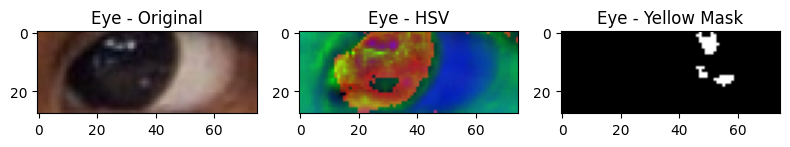

✅ Eyes Appear Normal


In [3]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
LEFT_EYE_IDX = [33, 133]
RIGHT_EYE_IDX = [362, 263]

# Eye cropping utility
def crop_eye(image, eye_indices, landmarks):
    h, w = image.shape[:2]
    x_coords = [int(landmarks[idx].x * w) for idx in eye_indices]
    y_coords = [int(landmarks[idx].y * h) for idx in eye_indices]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    pad = 5
    x_min, x_max = max(0, x_min - pad), min(w, x_max + pad)
    y_min, y_max = max(0, y_min - pad), min(h, y_max + pad)
    return image[y_min:y_max, x_min:x_max]

# Jaundice detection for a single eye image
def detect_jaundice(image, eye_label='Eye', debug=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_yellow = np.array([15, 40, 40])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    yellow_pixels = cv2.countNonZero(yellow_mask)
    total_pixels = image.shape[0] * image.shape[1]
    yellow_percentage = (yellow_pixels / total_pixels) * 100

    if debug:
        print(f"{eye_label} - Yellow pixel percentage: {yellow_percentage:.2f}%")
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"{eye_label} - Original")

        plt.subplot(1, 3, 2)
        plt.imshow(image_hsv)
        plt.title(f"{eye_label} - HSV")

        plt.subplot(1, 3, 3)
        plt.imshow(yellow_mask, cmap='gray')
        plt.title(f"{eye_label} - Yellow Mask")

        plt.tight_layout()
        plt.show()

    return yellow_percentage > 30.0

# Main execution
image_path = r"sample/ne.jpg"  # Set your image path here
image = cv2.imread(image_path)

if image is None:
    print("❌ Failed to load image. Check the file path.")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        print("🔍 Face detected. Proceeding with eye cropping...")
        landmarks = results.multi_face_landmarks[0].landmark
        left_eye = crop_eye(image, LEFT_EYE_IDX, landmarks)
        right_eye = crop_eye(image, RIGHT_EYE_IDX, landmarks)

        jaundice_left = detect_jaundice(left_eye, eye_label="Left Eye", debug=True)
        jaundice_right = detect_jaundice(right_eye, eye_label="Right Eye", debug=True)

        print("⚠️ Jaundice Detected in Left Eye!" if jaundice_left else "✅ Left Eye Appears Normal")
        print("⚠️ Jaundice Detected in Right Eye!" if jaundice_right else "✅ Right Eye Appears Normal")

    else:
        print("👁️ No face detected. Assuming image contains only an eye...")
        jaundice = detect_jaundice(image, eye_label="Eye", debug=True)
        print("⚠️ Jaundice Detected!" if jaundice else "✅ Eyes Appear Normal")

👁️ No face detected. Assuming image contains only an eye...
Eye - Yellow pixel percentage: 48.14%


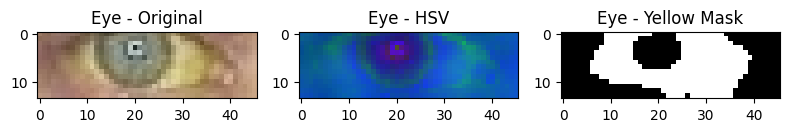

⚠️ Jaundice Detected!


In [4]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
LEFT_EYE_IDX = [33, 133]
RIGHT_EYE_IDX = [362, 263]

# Eye cropping utility
def crop_eye(image, eye_indices, landmarks):
    h, w = image.shape[:2]
    x_coords = [int(landmarks[idx].x * w) for idx in eye_indices]
    y_coords = [int(landmarks[idx].y * h) for idx in eye_indices]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    pad = 5
    x_min, x_max = max(0, x_min - pad), min(w, x_max + pad)
    y_min, y_max = max(0, y_min - pad), min(h, y_max + pad)
    return image[y_min:y_max, x_min:x_max]

# Jaundice detection for a single eye image
def detect_jaundice(image, eye_label='Eye', debug=False):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_yellow = np.array([15, 40, 40])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    yellow_pixels = cv2.countNonZero(yellow_mask)
    total_pixels = image.shape[0] * image.shape[1]
    yellow_percentage = (yellow_pixels / total_pixels) * 100

    if debug:
        print(f"{eye_label} - Yellow pixel percentage: {yellow_percentage:.2f}%")
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"{eye_label} - Original")

        plt.subplot(1, 3, 2)
        plt.imshow(image_hsv)
        plt.title(f"{eye_label} - HSV")

        plt.subplot(1, 3, 3)
        plt.imshow(yellow_mask, cmap='gray')
        plt.title(f"{eye_label} - Yellow Mask")

        plt.tight_layout()
        plt.show()

    return yellow_percentage > 30.0

# Main execution
image_path = r"sample/je.jpg"  # Set your image path here
image = cv2.imread(image_path)

if image is None:
    print("❌ Failed to load image. Check the file path.")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        print("🔍 Face detected. Proceeding with eye cropping...")
        landmarks = results.multi_face_landmarks[0].landmark
        left_eye = crop_eye(image, LEFT_EYE_IDX, landmarks)
        right_eye = crop_eye(image, RIGHT_EYE_IDX, landmarks)

        jaundice_left = detect_jaundice(left_eye, eye_label="Left Eye", debug=True)
        jaundice_right = detect_jaundice(right_eye, eye_label="Right Eye", debug=True)

        print("⚠️ Jaundice Detected in Left Eye!" if jaundice_left else "✅ Left Eye Appears Normal")
        print("⚠️ Jaundice Detected in Right Eye!" if jaundice_right else "✅ Right Eye Appears Normal")

    else:
        print("👁️ No face detected. Assuming image contains only an eye...")
        jaundice = detect_jaundice(image, eye_label="Eye", debug=True)
        print("⚠️ Jaundice Detected!" if jaundice else "✅ Eyes Appear Normal")